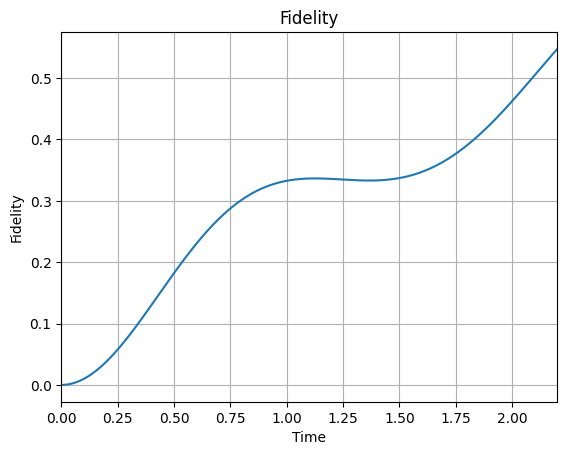

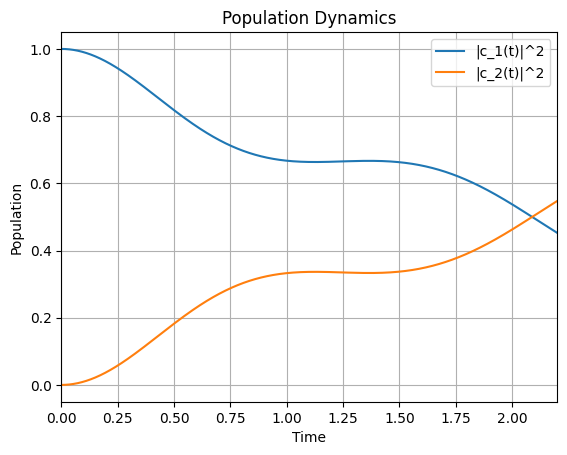

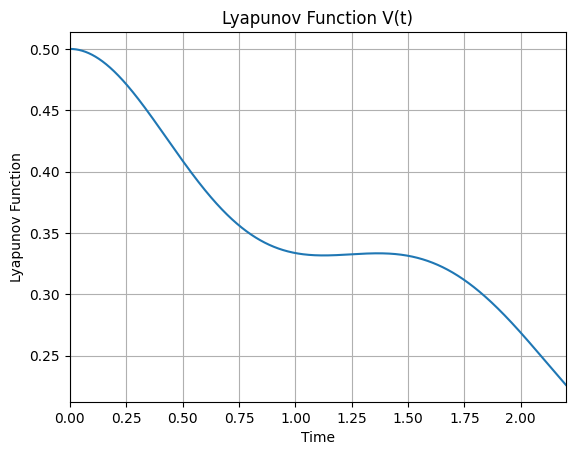

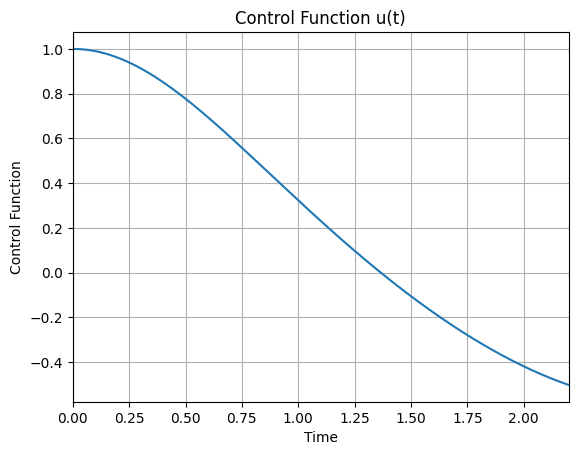

In [1]:
import numpy as np
import matplotib.pyplot as plt
from scipy.linalg import expm

# Adjusted control gain
K = 1.0

# Increase the total simulation time
tmax = 2.2    # Total time for the simulation
dt = 0.001    # Time step
tlist = np.arange(0, tmax + dt, dt)    # Time points for the simulation

# Define Pauli matrices
sigmaX = np.array([[0, 1], [1, 0]], dtype=complex)
sigmaY = np.array([[0, -1j], [1j, 0]], dtype=complex)
sigmaZ = np.array([[1, 0], [0, -1]], dtype=complex)

# Initial state: Lower state |psi_1> = |0>
psi1 = np.array([1, 0], dtype=complex)     # Initial state vector for |psi_1>

# Target state: Upper state |psi_2> = |1>
psi2 = np.array([0, 1], dtype=complex)     # Target state vector for |psi_2>

# Define the internal Hamiltonian H0 (sigmaZ) and control Hamiltonian H1 (sigmaY)
H0 = sigmaZ
H1 = sigmaY

# Function for Bang-bang control input based on the overlap with the target state
def ControlInput(psi, psi2, H1, K):
    overlap = np.imag(np.vdot(psi2, H1 @ psi))   # Compute the overlap
    return K *  overlap

# Unitary evolution operator for a small time step dt
def UnitaryOperator(H, dt):
    return expm(-1j * H * dt)

# Initialize lists to store control inputs and states
controlInputs = np.zeros(len(tlist))
states = np.zeros((2, len(tlist)), dtype=complex)
states[:, 0] = psi1   # Initial state

# Stepwise state evolution and control input storage
for k in range(len(tlist) - 1):
    control = ControlInput(states[:, k], psi2, H1, K)    # Get control input
    controlInputs[k] = control     # Store control input
    H = H0 + control * H1          # Calculate total Hamiltonian with control
    states[:, k+1] = UnitaryOperator(H, dt) @ states[:, k]  # Apply unitary evolution

controlInputs[-1] = controlInputs[-2]    # Ensure matching length of controlInputs with tlist

# Calculate fidelity: |<psi_2|psi(t)>|^2 for each time step
fidelity = np.abs(np.einsum('i,ij->j', np.conj(psi2), states))**2

# Calculate population for |psi_1> (|c1(t)|^2) and |psi_2> (|c2(t)|^2)
populationsPsi1 = np.abs(np.einsum('i,ij->j', np.conj(psi1), states))**2
populationsPsi2 = np.abs(np.einsum('i,ij->j', np.conj(psi2), states))**2

# Calculate Lyapunov function V(t) = 1/2 * (1 - fidelity)
lyapunov = 0.5 * (1 - fidelity)

# Plot fidelity over time
plt.figure()
plt.plot(tlist, fidelity, linewidth=1.5)
plt.title('Fidelity')
plt.xlabel('Time')
plt.ylabel('Fidelity')
plt.xlim([0, tmax])
plt.grid(True)
plt.savefig('Fidelity.pdf')  # Save as PDF

# Plot population dynamics over time
plt.figure()
plt.plot(tlist, populationsPsi1, label='|c_1(t)|^2', linewidth=1.5)
plt.plot(tlist, populationsPsi2, label='|c_2(t)|^2', linewidth=1.5)
plt.title('Population Dynamics')
plt.xlabel('Time')
plt.ylabel('Population')
plt.legend()
plt.xlim([0, tmax])
plt.grid(True)
plt.savefig('Population.pdf')  # Save as PDF

# Plot Lyapunov function over time
plt.figure()
plt.plot(tlist, lyapunov, linewidth=1.5)
plt.title('Lyapunov Function V(t)')
plt.xlabel('Time')
plt.ylabel('Lyapunov Function')
plt.xlim([0, tmax])
plt.grid(True)
plt.savefig('Lyapunov.pdf')  # Save as PDF

# Plot control function over time
plt.figure()
plt.plot(tlist, controlInputs, linewidth=1.5)
plt.title('Control Function u(t)')
plt.xlabel('Time')
plt.ylabel('Control Function')
plt.xlim([0, tmax])
plt.grid(True)
plt.savefig('ControlFunction.pdf')  # Save as PDF

# Show all plots
plt.show()
